# Analysis of convergence of mean and standard deviation for different sampling methods

## Abstract
Let's analyze the convergence of the mean and standard deviation for different sampling methods. We will use the following sampling methods:
- Pseudo random sampling
- LHS
- Halton
- Hammersley
- Sobol

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters

sampler_list = ['pseudo', 'LHS', 'Halton', 'Hammersley', 'Sobol']
energies_list = ['elec_energy','cav_energy','disp_energy','nonpolar_energy','solv_energy']
protein_name = "1112_tetrachloroethane"
N = 1000

def get_df(protein_name, sampler):
    """Given the required parameters, it returns the dataframe of the experiment.
    
    Parameters
    ----------
    protein_name : string
        Name of the protein to get the dataframe.

    sampler : string
        Sampler of the experiment to get the dataframe.

    Returns
    -------
    df : pandas.DataFrame
        Dataframe of the experiment.
    """
    
    folder_name = "tests/output_{}_{}".format(protein_name,sampler)
    df = pd.read_csv(folder_name + "/output_consolidated.csv")
    # drop last two rows
    df = df.iloc[:-2]
    return df

def get_mean_and_stdd(protein_name, required_energy, sampler, N_low_limit, N_up_limit):
    """Given the required parameters, it returns the mean and std of the sampler and required energy in the dataframe.
    It returns a tuple with two arrays containing the mean and the standard deviation in each iteration.
    
    Parameters
    ----------
    required_energy : string
        Energy to calculate mean and standard deviation.

    sampler : string
        Sampler of the experiment to calculate mean and standard deviation.
    
    N_low_limit : int
        Lower limit of the iterations to calculate mean and standard deviation.

    N_up_limit : int
        Upper limit of the iterations to calculate mean and standard deviation.

    Returns
    -------
    (energy_mean_array, energy_stdd_array):
        Tuple with two arrays containing the mean and the standard deviation in each iteration.
    """

    df = get_df(protein_name, sampler)

    energy_mean_array = np.zeros(N_up_limit-N_low_limit+1)
    energy_stdd_array = np.zeros(N_up_limit-N_low_limit+1)
    
    for i in range(N_up_limit-N_low_limit+1):
        energy_mean_array[i] = df[required_energy][N_low_limit:i].mean()
        energy_stdd_array[i] = df[required_energy][N_low_limit:i].std()
    
    return (energy_mean_array, energy_stdd_array)
    

Having the function to calculate the mean and standard deviation of a function, we proceed to calculate the mean and standard deviation of each energy for each type of sampler. They will be shown in a 5x2 graph, where each row will indicate the type of energy, and column 1 will be the mean and column 2 the standard deviation.

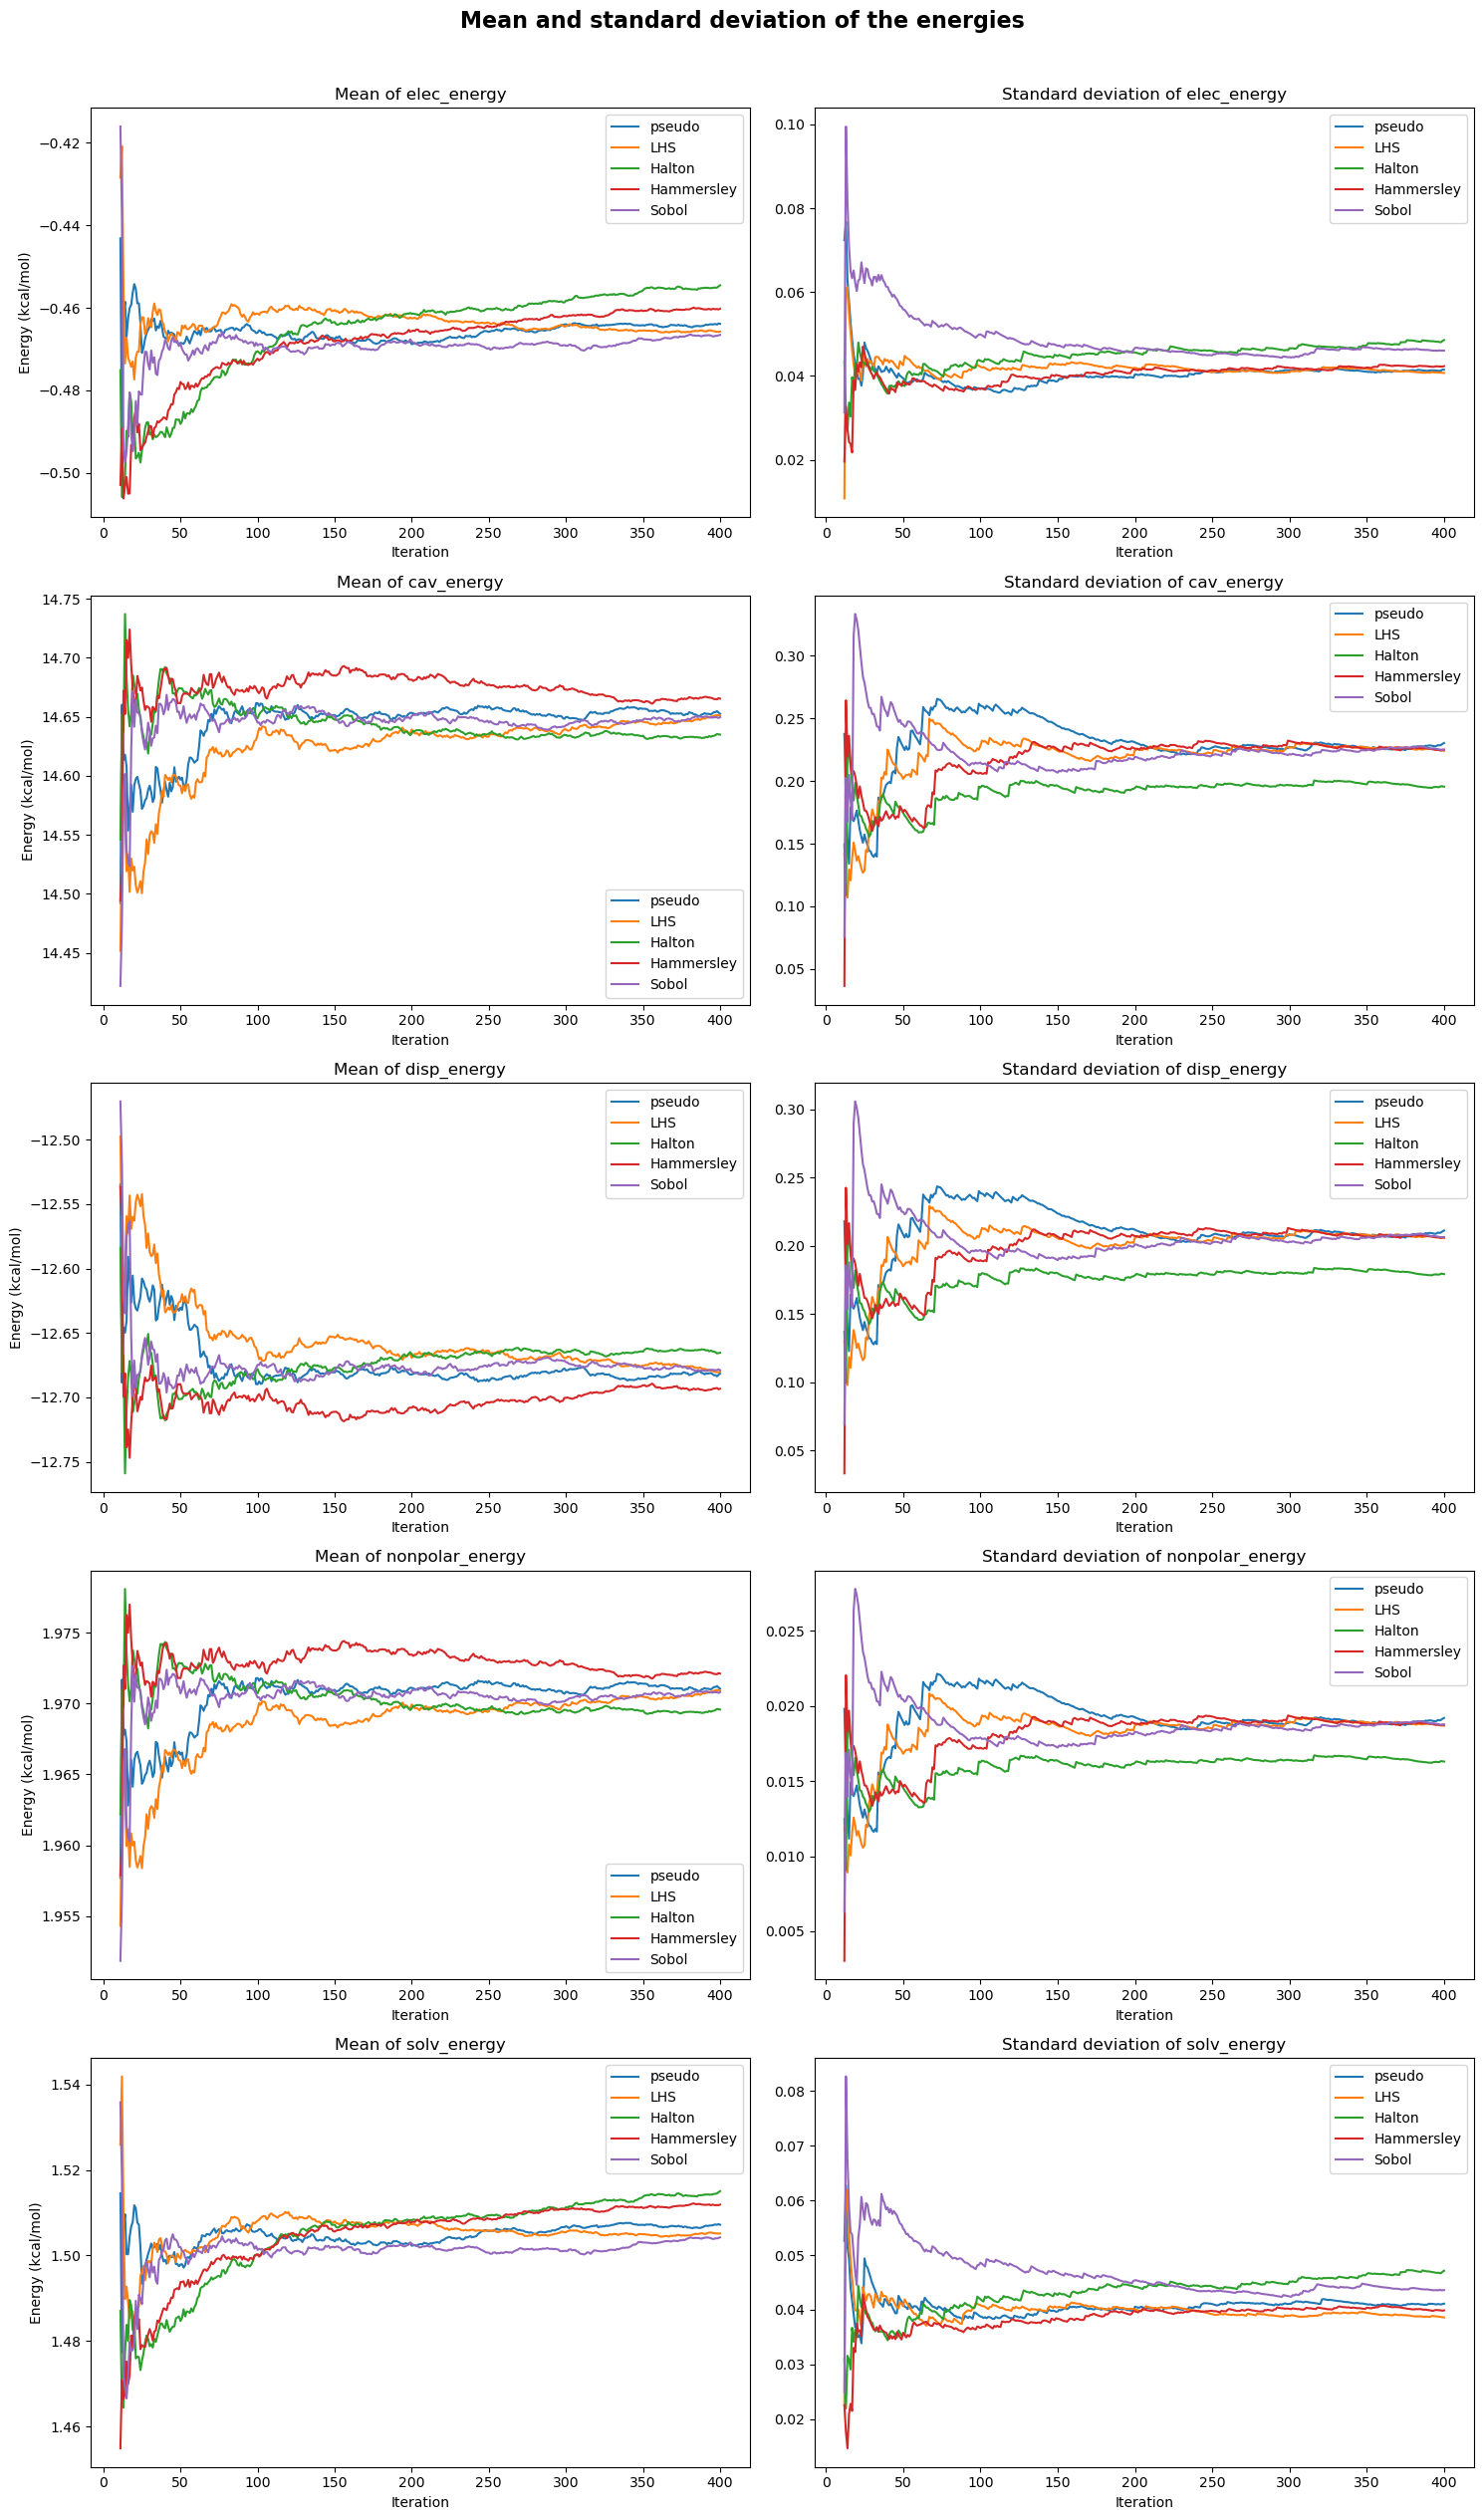

In [4]:
i=0
N_plot = (5,400)
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
plt.suptitle("Mean and standard deviation of the energies",fontsize=16, fontweight='bold', y=1.01)
X = np.arange(N_plot[0],N_plot[1]+1)
for required_energy in energies_list:
    for sampler in sampler_list:
        energy_mean_array, energy_stdd_array = get_mean_and_stdd(protein_name, required_energy, sampler, N_plot[0], N_plot[1])
        
        axes[i,0].plot(X, energy_mean_array, label=sampler)
        axes[i,0].set_title("Mean of {}".format(required_energy))
        axes[i,0].legend()
        axes[i,0].set_xlabel("Iteration")
        axes[i,0].set_ylabel("Energy (kcal/mol)")

        axes[i,1].plot(X, energy_stdd_array, label=sampler)
        axes[i,1].set_title("Standard deviation of {}".format(required_energy))
        axes[i,1].legend()
        axes[i,1].set_xlabel("Iteration")
        #axes[i,1].set_ylabel("Energy (kcal/mol)")
    i+=1
plt.tight_layout()
plt.savefig("convergence.png",dpi=300)
plt.show()

Same analysis, but now, we will use groups of 100 samples and then plot the mean of mean and standard deviation of each energy for each type of sampler.